
Training with AdaDelta (learning rate 0.01)
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3084 - loss: 2.0456 - val_accuracy: 0.7757 - val_loss: 1.1309
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7844 - loss: 1.0086 - val_accuracy: 0.8445 - val_loss: 0.6937
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8432 - loss: 0.6683 - val_accuracy: 0.8740 - val_loss: 0.5387
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8687 - loss: 0.5337 - val_accuracy: 0.8877 - val_loss: 0.4630
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8810 - loss: 0.4642 - val_accuracy: 0.8955 - val_loss: 0.4188
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8886 - loss: 0.4286 - val_accuracy: 0.9012 - val_loss: 0.3896
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8939 - loss: 0.4004 - val_accuracy: 0.9033 - val_loss: 0.3681
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 

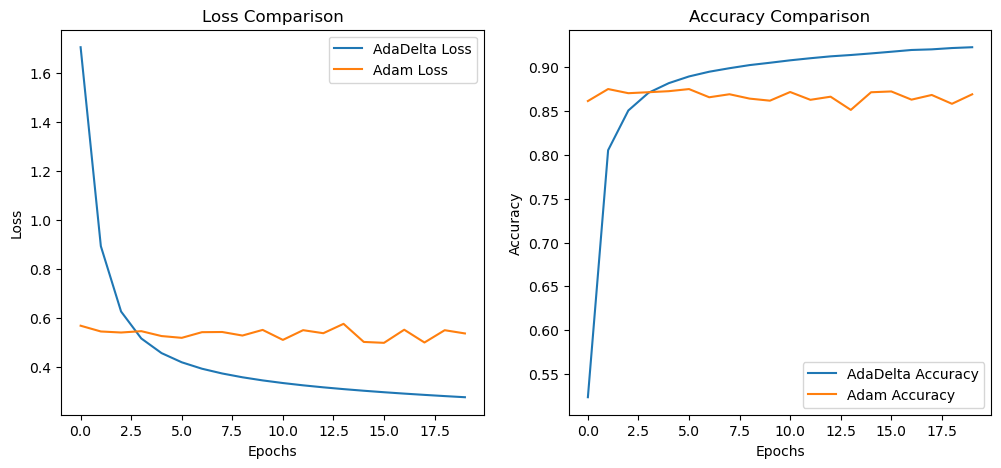

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the digit dataset (MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0  

# Flatten images into 1D vectors (784 inputs)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')                      # Output layer (10 classes)
])

# Step 3: Compile & Train with AdaDelta (learning rate 0.01)
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nTraining with AdaDelta (learning rate 0.01)")
history_adadelta = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Step 4: Recompile & Train with Adam (learning rate 0.05)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nTraining with Adam (learning rate 0.05)")
history_adam = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Step 5: Compare loss/accuracy curves
plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history_adadelta.history['loss'], label="AdaDelta Loss")
plt.plot(history_adam.history['loss'], label="Adam Loss")
plt.title("Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history_adadelta.history['accuracy'], label="AdaDelta Accuracy")
plt.plot(history_adam.history['accuracy'], label="Adam Accuracy")
plt.title("Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
